# There are notes below each cell, discribing functionality

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import fast_histogram as fh
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl

This simply imports things that will be needed for the program

In [2]:
data = pd.read_csv('/home/matteo/Documents/research/summer2019/coltrims/Acetonitrile/acetonitrile_28_54_2000_DAn.000004235_4375_8400_8450.csv')
data['index0'] = data.index

Imports the data and adds the index as a column so that it can be saved when creating pairwise coincidences. This is so you can simply do the calculations to all the datapoints you will need, aka those that are gated with sumdif, and then populate a dataframe where each row is a coincidence.

If this is unclear, it should make more sense lower down.

In [3]:
#data.tof = data.tof.apply(lambda tof: tof/1000)
#data.x = data.x.apply(lambda x: x/1000)
#data.y = data.y.apply(lambda y: y/1000)

pairwiseprint(data.iloc[:10])


   delay       x       y       tof      id  index0
0    0.0  -4.357  -2.865  2099.634   171.0       0
1    0.0   2.013   1.078  6335.992   171.0       1
2    0.0  17.274   4.665  2083.474  2477.0       2
3    0.0  -2.336   0.373  6349.737  2477.0       3
4    0.0  25.082  -4.899  2050.030  2510.0       4
5    0.0  -4.283   1.293  6374.193  2510.0       5
6    0.0  11.264 -14.228  2093.531  2527.0       6
7    0.0  -0.592   3.198  6342.841  2527.0       7
8    0.0  -8.218 -18.935  2036.810  2551.0       8
9    0.0   0.375   0.724  6368.359  2551.0       9


This changes the units of x, y, and tof such that x and y are in mm and tof is in ns

0.1298788071311436 percent of data kept
4432


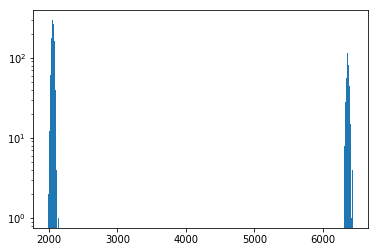

In [4]:
# if you are doing tripico, run this
value_counts = data['id'].value_counts()
coinc = data[data['id'].isin(value_counts[value_counts > 3].index)]
coinc.reset_index(inplace=True,drop=True)

print(str(coinc.shape[0]/data.shape[0]*100)+' percent of data kept') 
print(coinc.shape[0])

plt.hist(coinc.tof,bins=1000)
plt.yscale('log', nonposy='clip')
plt.show()


In [5]:
#this is probably going to take forever no matter what, it is setting up every possible pairwise combination

#data = data.iloc[:2000000]

pairwise = pd.DataFrame([[k, c0, c1,c2,c3] for k, index in data.groupby('id').index0
                                  for c0, c1 , c2,c3 in combinations(index, 4)
                             ], columns=['id', 'index1', 'index2','index3','index4'])





'''
pairwise = pd.DataFrame([[k, c0, c1, c2] for k, index in coinc.groupby('id').index0
                                  for c0, c1, c2 in combinations(index, 3)
                             ], columns=['id', 'index1', 'index2', 'index3'])
'''



"\npairwise = pd.DataFrame([[k, c0, c1, c2] for k, index in coinc.groupby('id').index0\n                                  for c0, c1, c2 in combinations(index, 3)\n                             ], columns=['id', 'index1', 'index2', 'index3'])\n"

In [7]:
#print(pairwise)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


3.2188758248682006


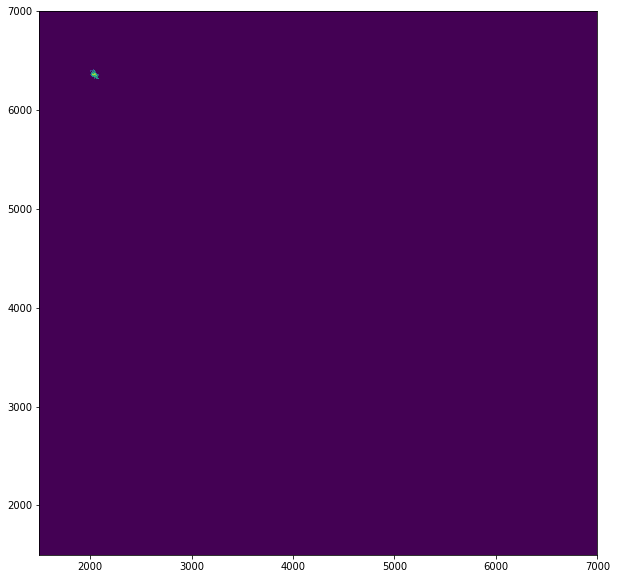

In [9]:
def pipico(tmin,tmax,binN,dataIndexes):
    
    y = data.loc[dataIndexes['index4']]['tof'].reset_index(drop=True)
    x = data.loc[dataIndexes['index1']]['tof'].reset_index(drop=True)#+data.loc[dataIndexes['index2']]['tof'].reset_index(drop=True)
    
    
    hist = fh.histogram2d(y,x,range = [[tmin,tmax],[tmin,tmax]],bins = binN)

    hist = np.log(hist)
    hist[hist == -np.inf] = 0

    print(hist.max())

    dx = (tmax-tmin)/binN

    y, x = np.mgrid[slice(tmin, tmax + dx, dx),
    slice(tmin, tmax + dx, dx)]

    plt.pcolormesh(x,y,hist)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.show()


pipico(1500,7000,1000,pairwise)


Creates all pairwise combinations of detections in the same event so that sumdif gating can be applied

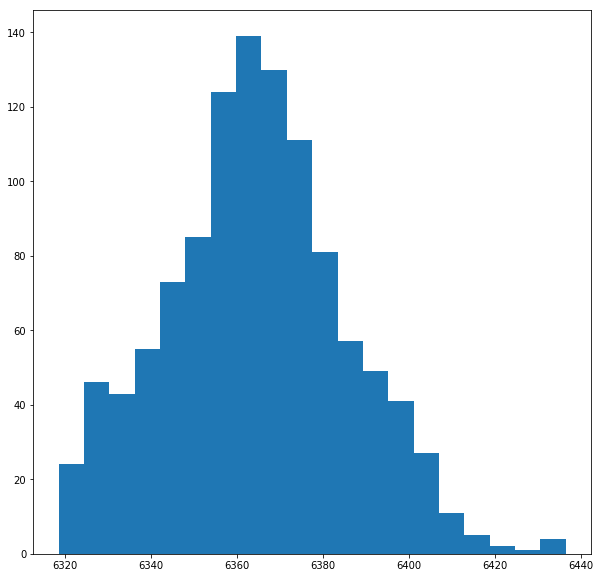

True     832
False    276
Name: yes, dtype: int64


In [12]:
temp = pd.DataFrame()
temp['INDEX1'] = data.iloc[pairwise['index1'].values].tof.values
temp['INDEX2'] = data.iloc[pairwise['index2'].values].tof.values
temp['INDEX3'] = data.iloc[pairwise['index3'].values].tof.values
temp['INDEX4'] = data.iloc[pairwise['index4'].values].tof.values

plt.hist(temp.INDEX4,bins=20)
plt.show()

temp['check1'] = (temp['INDEX3'] < 2100)
temp['check2'] = (temp['INDEX4'] < 6390) & (temp['INDEX4'] > 6330)

temp['yes'] = (temp['check1'])&(temp['check2'])
print(temp['yes'].value_counts())

cutIndexes = pairwise[temp['yes']].reset_index(drop=True)

#print(temp)
#print(indList)

This function actually goes through the process of doing the gating

In [13]:
indList = [int(col[-1]) for col in cutIndexes if col.startswith('index')]

print(cutIndexes.shape[0],'rows')
print(cutIndexes)

832 rows
              id   index1   index2   index3   index4
0        69507.0      264      265      266      267
1      1086588.0     4610     4611     4612     4613
2      1284168.0     5567     5568     5569     5570
3      1995753.0     8869     8870     8871     8872
4      2508919.0    11145    11146    11147    11148
5      3605021.0    16173    16174    16175    16176
6      3738939.0    16803    16804    16805    16806
7      4285063.0    19298    19299    19300    19301
8      4383693.0    19784    19785    19786    19787
9      5024792.0    22684    22685    22686    22687
10     5987532.0    26984    26985    26986    26987
11     9806026.0    44419    44420    44421    44422
12    10434554.0    47199    47200    47201    47202
13    11212400.0    50622    50623    50624    50625
14    11483955.0    51796    51797    51798    51799
15    12887729.0    57979    57980    57981    57982
16    13292320.0    59887    59888    59889    59890
17    13403851.0    60403    60404   

Completes the gating with the above gates.

Format: [difmin, difmax, summin, summax]

Also creates a list of the indexes numerically

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


3.5263605246161616


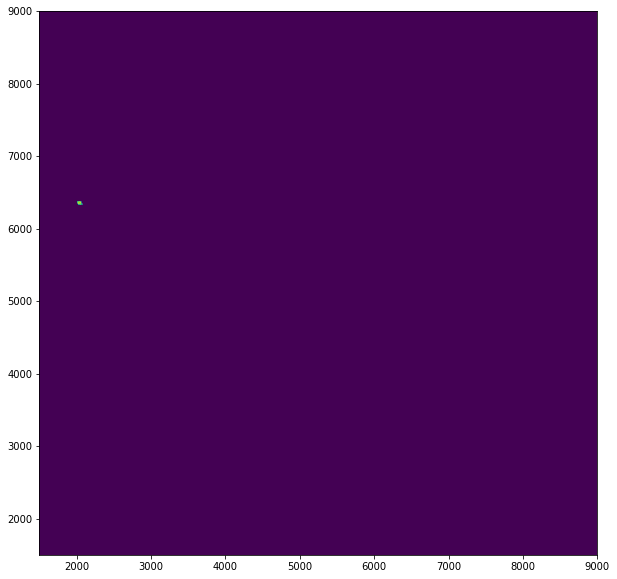

In [14]:
def tripico(tmin,tmax,binN,dataIndexes):
    
    y = data.loc[dataIndexes['index4']]['tof'].reset_index(drop=True)
    x = data.loc[dataIndexes['index1']]['tof'].reset_index(drop=True)#+data.loc[dataIndexes['index2']]['tof'].reset_index(drop=True)
    
    hist = fh.histogram2d(y,x,range = [[tmin,tmax],[tmin,tmax]],bins = binN)

    hist = np.log(hist)
    hist[hist == -np.inf] = 0

    print(hist.max())

    dx = (tmax-tmin)/binN

    y, x = np.mgrid[slice(tmin, tmax + dx, dx),
    slice(tmin, tmax + dx, dx)]

    plt.pcolormesh(x,y,hist)
    plt.rcParams["figure.figsize"] = [10,10]
    plt.show()


tripico(1500,9000,1000,cutIndexes)


In [15]:
compList = pd.DataFrame(np.unique(np.concatenate((cutIndexes['index1'].values,cutIndexes['index2'].values,cutIndexes['index3'].values,cutIndexes['index4'].values),axis=0)),columns=['index0'])

Generates a dataframe with a complete list of the indexes of the datafile that were left over after the gating. The momentum and other physics calculations that just involve one particle will be done here, since you can populate the coincidence dataframe later with that info. 

(Man I love Pandas, those one-liners are so nice)

In [16]:
def dataPopulation(data,compList):
        
    temp = data.loc[compList['index0']][['x','y','tof','id','delay']]
    return temp


compList = dataPopulation(data,compList)
#compList['id'] = data.iloc[compList['index0'].values].id.reset_index(drop=True)

print(compList.iloc[:8])

           x       y       tof         id  delay
264  -13.392  -7.057  2048.020    69507.0  5.088
265   37.505   9.914  2058.843    69507.0  5.088
266   43.075  26.696  2076.727    69507.0  5.088
267    3.353   1.630  6359.080    69507.0  5.088
4610 -10.359   7.845  2027.367  1086588.0  3.290
4611 -22.479  11.715  2030.439  1086588.0  3.290
4612 -19.971  -6.818  2054.636  1086588.0  3.290
4613  -2.296   0.385  6371.512  1086588.0  3.290


Fills in the data in the Dataframe of the post-cut detections

-0.012102546899472988 0.9888724704504548


<Figure size 720x720 with 0 Axes>

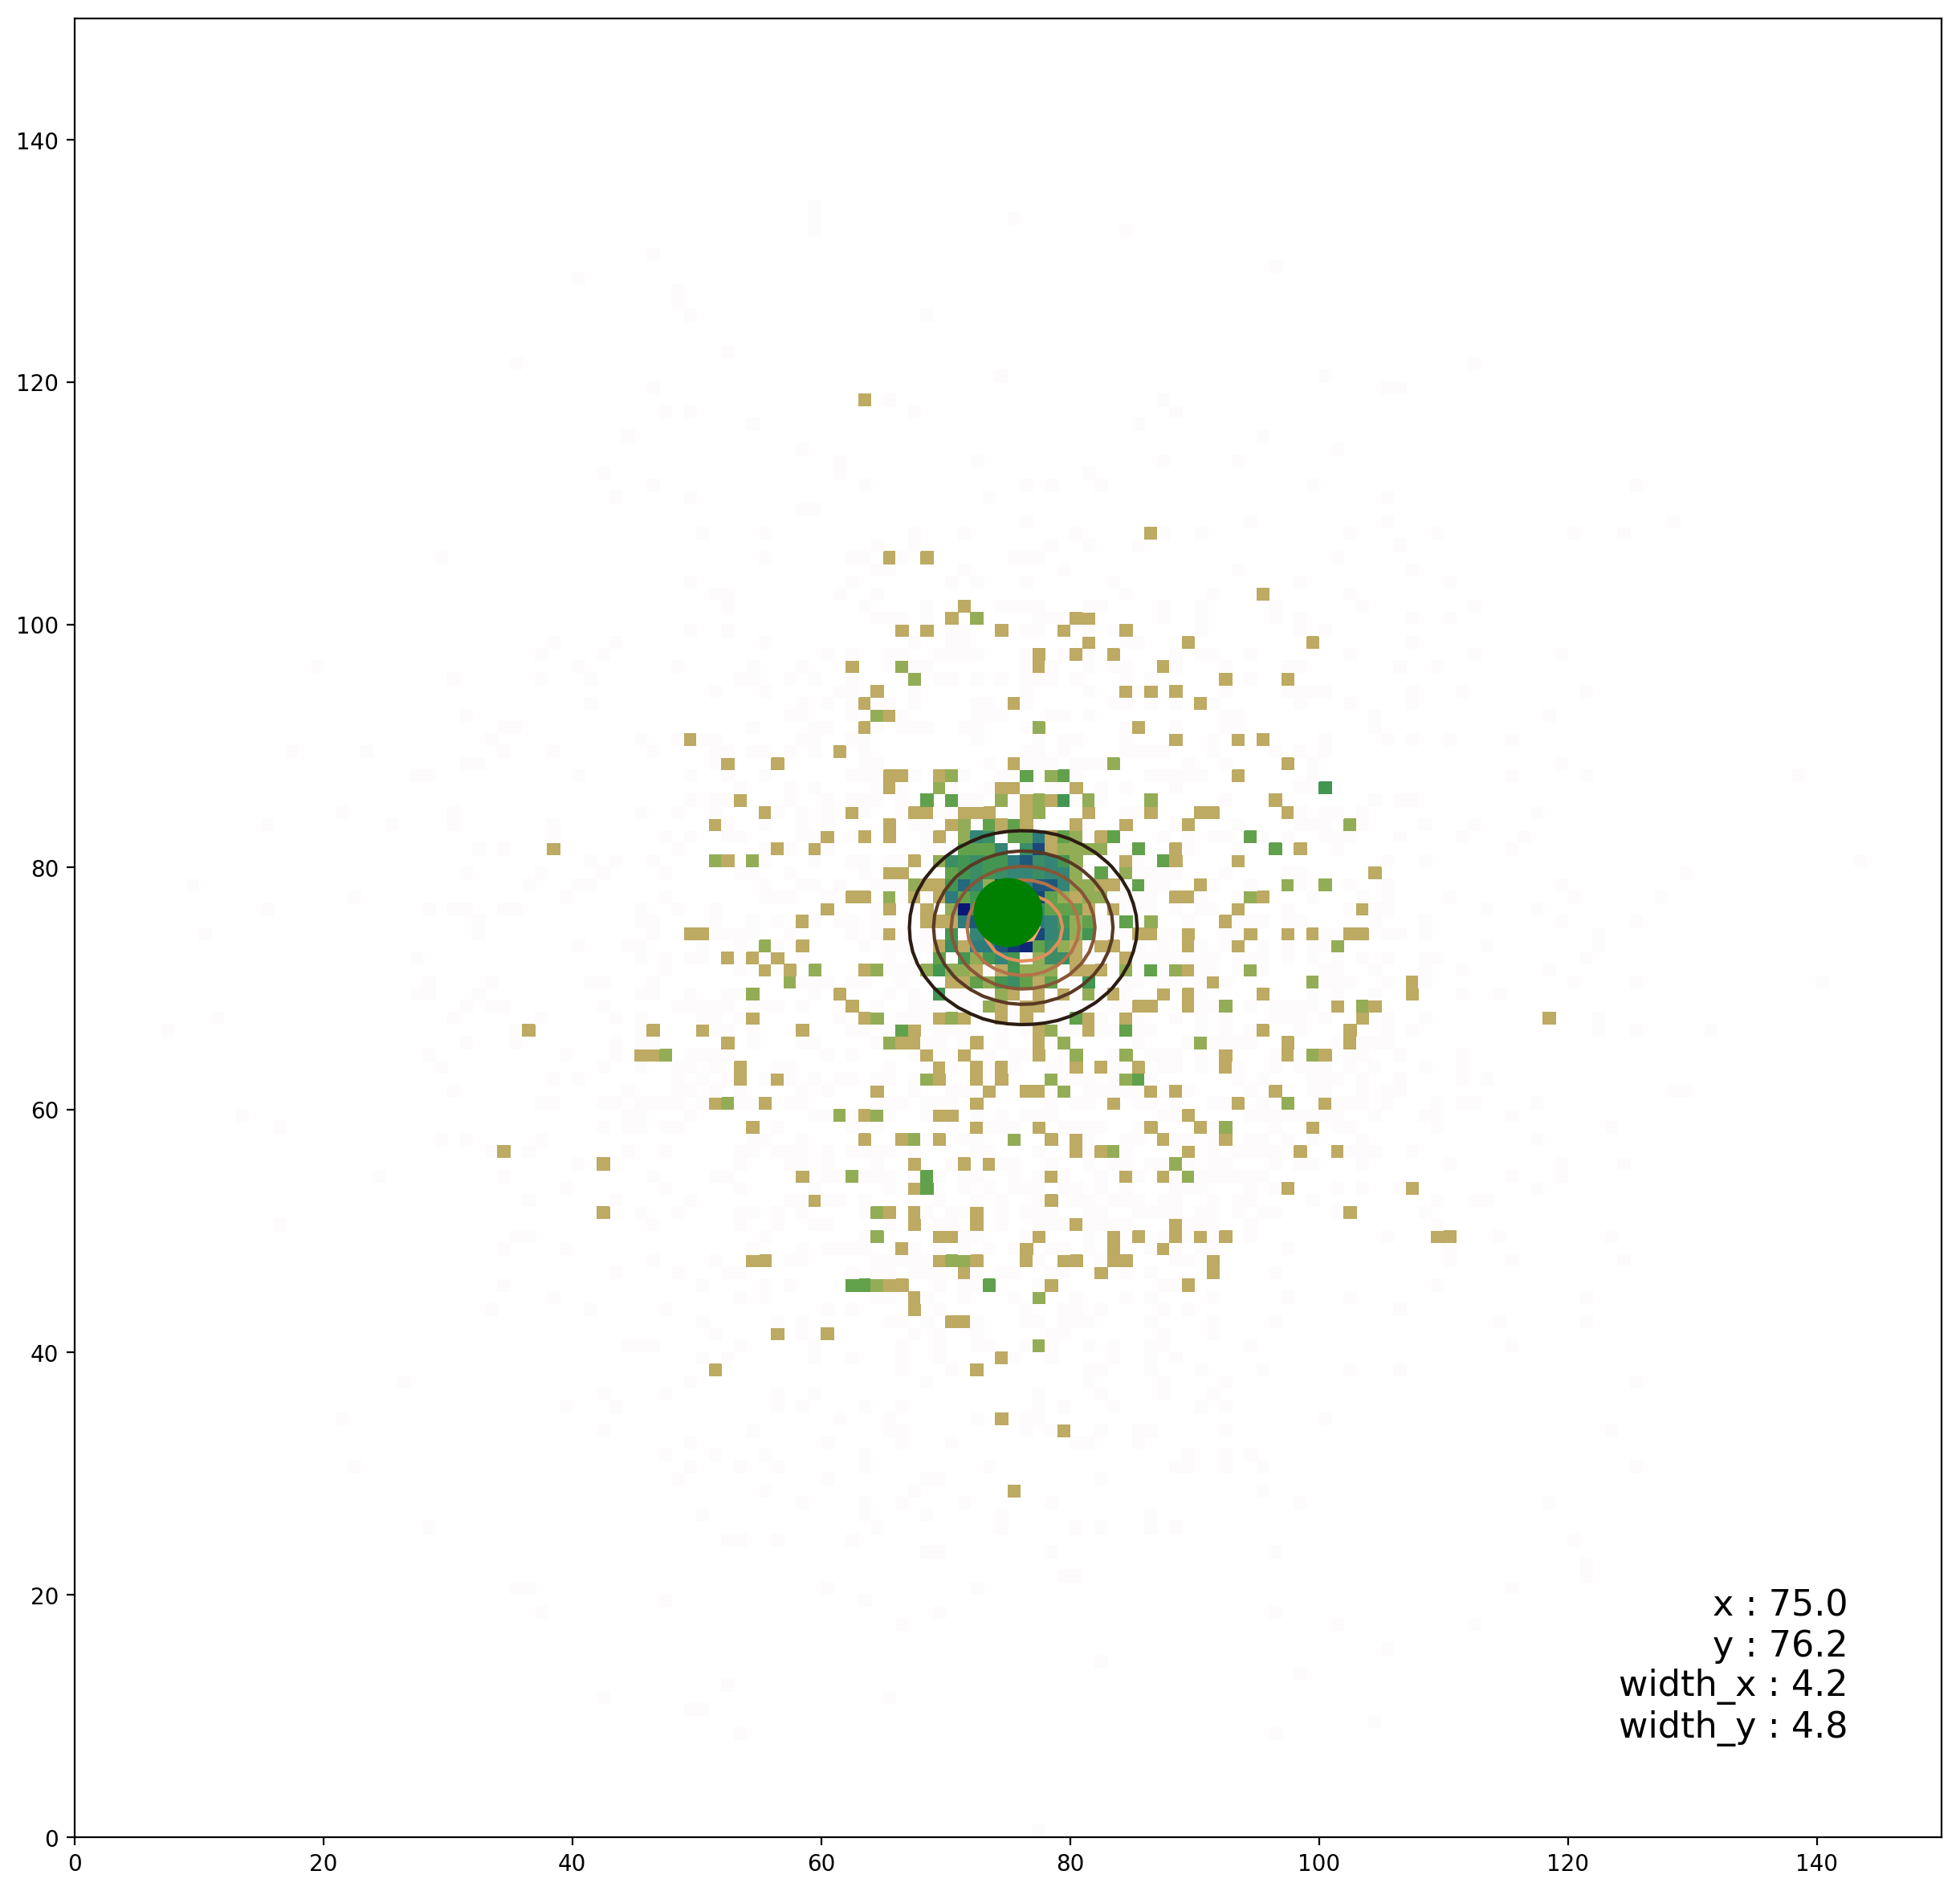

In [17]:
def getCenter(datalist):
    
    from helper import center_by_moments
    
    xmin = -60
    xmax = 60
    xbin = 150

    xy_hist = fh.histogram2d(datalist['x'],datalist['y'],range = [[xmin,xmax],[xmin,xmax]],bins = xbin)

    dx = (xmax- xmin)/xbin

    y_, x_ = np.mgrid[slice(xmin, xmax, dx),
               slice(xmin, xmax, dx)]

    x0,y0 = center_by_moments(x_[0],x_[0],xy_hist,True)
    
    return float(x0),float(y0)

x0, y0 = getCenter(compList)
print(x0,y0)

Gets the center of physics of the cut data.

In [139]:
from helper import fitEfield
from helper import GetZVelocity

E_field_new, ion_drift_length_new, t0_new = fitEfield()

print(t0_new)

ion_accel_length = 0.27

#in increasing order of mass (ie, mass of t1, mass of t2, etc)
#and the corisponding charge
mass = [1,1,1,38]
mass_si = [(m * 1.66056e-27) for m in mass]
charge = [1,1,1,1]

t0_new = 1257.1 #modify till 


def apInd(string,ind):
    
    return string+str(ind)


<Parameter 't0', value=1270.3948332250093 +/- 2.44, bounds=[-inf:inf]>


The above cell sets up calculating the three componants of momenta. It and the two cells below are (I think) generalized for tripico as well.

Change mass and charge as needed. 

In [140]:
def filldata(compList,cutIndexes):
    
    addit = [cutIndexes]
    
    for ind in indList:
        
        temp0 = data.loc[cutIndexes[apInd('index',ind)]][['x','y','tof','delay']].reset_index(drop=True)
        temp0.columns = [apInd(col,ind) for col in temp0]
        addit.append(temp0)
  
    return pd.concat(addit, axis=1)
    

coincXYT = filldata(compList,cutIndexes)

  
print(coincXYT)


              id   index1   index2   index3   index4      x1      y1  \
0        69507.0      264      265      266      267 -13.392  -7.057   
1      1086588.0     4610     4611     4612     4613 -10.359   7.845   
2      1284168.0     5567     5568     5569     5570 -30.859  -7.080   
3      1995753.0     8869     8870     8871     8872  -8.578 -15.546   
4      2508919.0    11145    11146    11147    11148   0.000 -15.910   
5      3605021.0    16173    16174    16175    16176  -0.029  -6.058   
6      3738939.0    16803    16804    16805    16806  -0.129 -17.633   
7      4285063.0    19298    19299    19300    19301 -16.730 -21.720   
8      4383693.0    19784    19785    19786    19787   5.284  -4.248   
9      5024792.0    22684    22685    22686    22687  -2.874  26.320   
10     5987532.0    26984    26985    26986    26987  11.477 -20.487   
11     9806026.0    44419    44420    44421    44422 -29.994  -6.174   
12    10434554.0    47199    47200    47201    47202  -8.196 -20

In [141]:
def velocP(coincXYT):
    
    addit = [coincXYT]
    
    for ind in indList:      
        
        temp = pd.DataFrame()
        
        temp[apInd('tof0',ind)] = coincXYT[apInd('tof',ind)]-t0_new   
     
        temp[apInd('vx',ind)] = (coincXYT[apInd('x',ind)] - (x0+.6)) / (coincXYT[apInd('tof',ind)] - t0_new) * 1000000
        temp[apInd('vy',ind)] = (coincXYT[apInd('y',ind)] - (y0-1.55)) / (coincXYT[apInd('tof',ind)] - t0_new) * 1000000
        temp[apInd('vz',ind)] = temp[apInd('tof0',ind)].apply(GetZVelocity,args=(mass[ind-1],charge[ind-1],E_field_new, ion_accel_length ,ion_drift_length_new))    
        
        temp[apInd('px',ind)] = mass_si[ind-1] * temp[apInd('vx',ind)] * 0.5 * 1e24
        temp[apInd('py',ind)] = mass_si[ind-1] * temp[apInd('vy',ind)] * 0.5 * 1e24
        temp[apInd('pz',ind)] = mass_si[ind-1] * temp[apInd('vz',ind)] * 0.5 * 1e24
    
        addit.append(temp)

    return(pd.concat(addit, axis=1))
    

completePop = velocP(coincXYT)

print(completePop.shape)
#print(completePop)

(832, 49)


Populates all three components of velocity, as well as the momentum for every detection selected with the cut, using the masses and charges given above.

In [142]:
completePop['pxsum'] = completePop[['px1','px2','px3','px4']].sum(axis=1)
completePop['pysum'] = completePop[['py1','py2','py3','py4']].sum(axis=1)
completePop['pzsum'] = completePop[['pz1','pz2','pz3','pz4']].sum(axis=1)

(0.15417331009136453, 34.368359177552136)


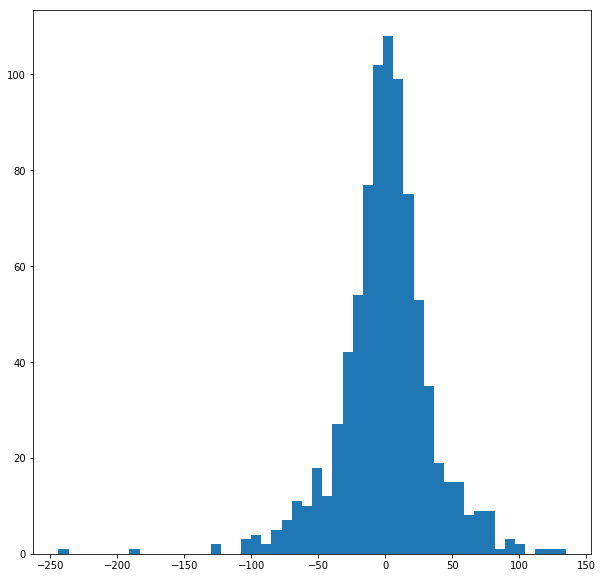

In [146]:
pCur = completePop['pysum']
plt.hist(pCur,bins=50)
print(norm.fit(pCur))
plt.show()

In [147]:
plist = [col for col in completePop if col.startswith('p')]
plist_si = [p+'_si' for p in plist]
print(plist,plist_si)

for p_si in plist_si:
    
    completePop[p_si] = completePop[p_si[:-3]] * 2e-24 


['px1', 'py1', 'pz1', 'px2', 'py2', 'pz2', 'px3', 'py3', 'pz3', 'px4', 'py4', 'pz4', 'pxsum', 'pysum', 'pzsum'] ['px1_si', 'py1_si', 'pz1_si', 'px2_si', 'py2_si', 'pz2_si', 'px3_si', 'py3_si', 'pz3_si', 'px4_si', 'py4_si', 'pz4_si', 'pxsum_si', 'pysum_si', 'pzsum_si']


In [148]:
completePop['KE1_ev'] = (completePop['px1_si']**2 + completePop['py1_si']**2 + completePop['pz1_si']**2) /(2*mass_si[0]) *6.242e18
completePop['KE2_ev'] = (completePop['px2_si']**2 + completePop['py2_si']**2 + completePop['pz2_si']**2) /(2*mass_si[1]) *6.242e18
completePop['KE3_ev'] = (completePop['px3_si']**2 + completePop['py3_si']**2 + completePop['pz3_si']**2) /(2*mass_si[2]) *6.242e18
completePop['KE4_ev'] = (completePop['px4_si']**2 + completePop['py4_si']**2 + completePop['pz4_si']**2) /(2*mass_si[3]) *6.242e18

(832, 71)


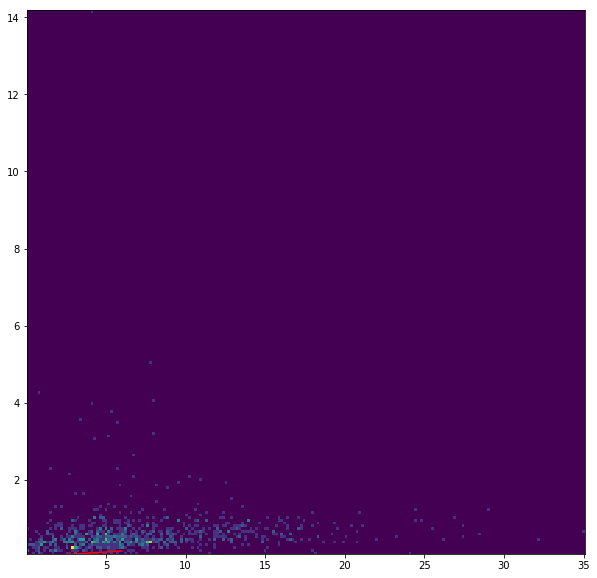

In [151]:
print(completePop.shape)
xx_ = np.arange(0,6,.01)
yy_ = xx_*(mass[0]/mass[3])

plt.hist2d(completePop.KE1_ev,completePop.KE4_ev,bins=200)
plt.plot(xx_,yy_,'r')
plt.show()

In [152]:
completePop['KER_ev'] = completePop['KE1_ev'] + completePop['KE2_ev'] + completePop['KE3_ev'] + completePop['KE4_ev']

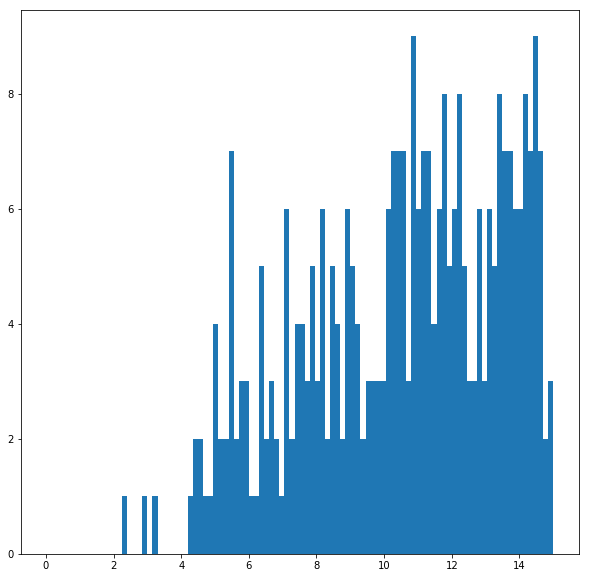

In [154]:
plt.hist(completePop.KER_ev,bins=100,range=[0,15])
plt.show()

In [155]:
completePop['ptot'] = (completePop['pxsum']**2 + completePop['pysum']**2 + completePop['pzsum']**2)**.5

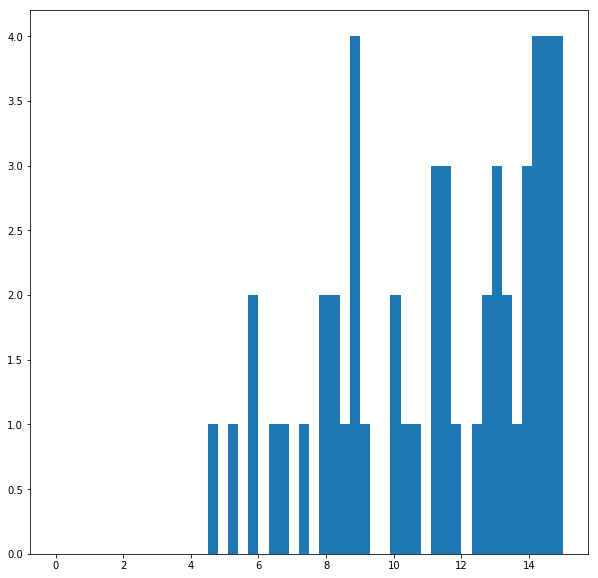

In [158]:
plt.hist(completePop.ptot,bins=50,range=[0,15])
plt.show()

(832, 73)


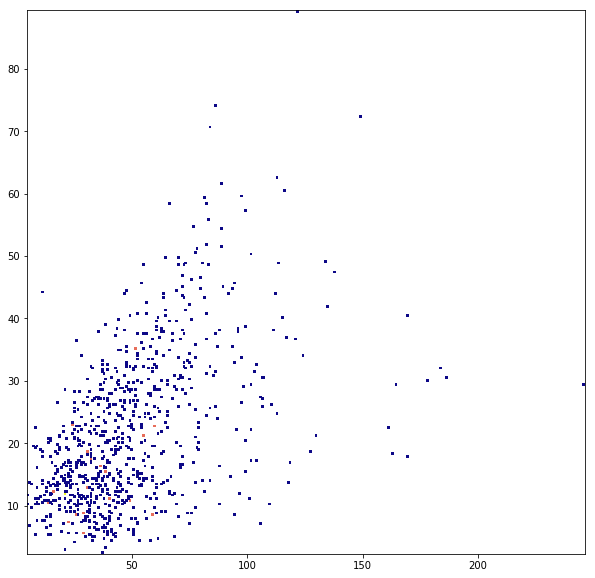

In [160]:
print(completePop.shape)
plt.hist2d(completePop.ptot,completePop.KER_ev,bins=300,norm=mpl.colors.LogNorm(),cmap=mpl.cm.plasma)
plt.show()

In [170]:
keCut = completePop#[completePop['ptot'] < 50]
print(keCut.shape[0]/completePop.shape[0])

1.0


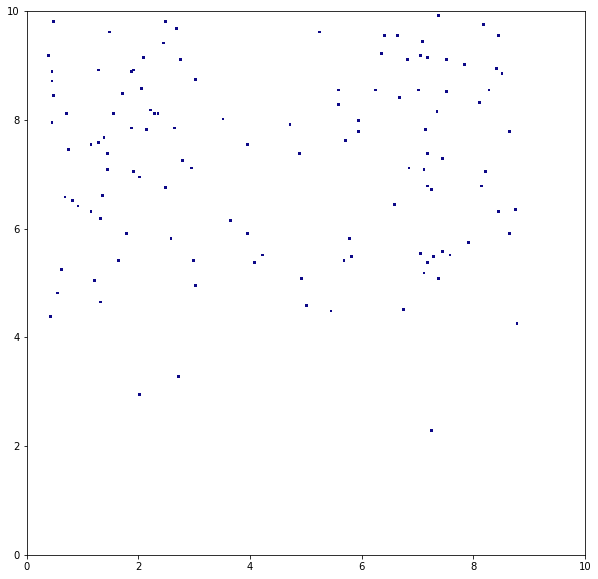

In [171]:
plt.hist2d(keCut.delay1,keCut.KER_ev,bins=300,range= [[0, 10], [0, 10]],norm=mpl.colors.LogNorm(),cmap=mpl.cm.plasma)
plt.show()

In [173]:
kECut = completePop#[completePop['KER_ev'] < 2]


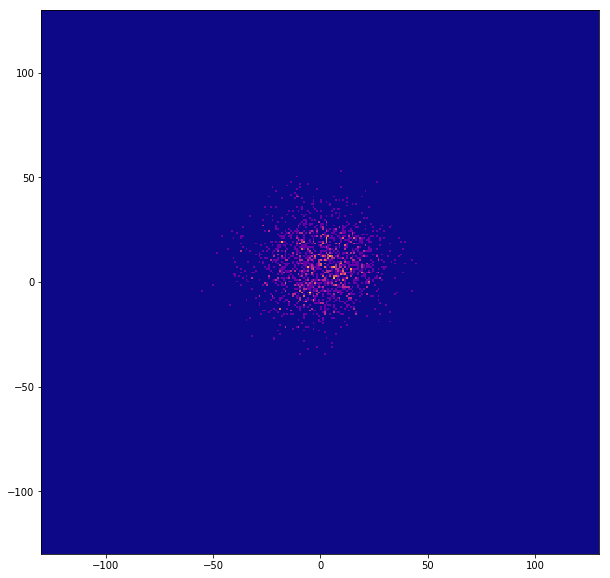

In [174]:
pX = pd.concat([kECut['px1'],kECut['px2']])
pY = pd.concat([kECut['py1'],kECut['py2']])
pZ = pd.concat([kECut['pz1'],kECut['pz2']])


#plt.hist2d(kECut.pz1,kECut.px1+kECut.py1,bins=300,range=[[-100,100],[-140,120]])
plt.hist2d(pX,(pY+pZ)/np.sqrt(2),bins=300,range=[[-130,130],[-130,130]],cmap=mpl.cm.plasma)
plt.show()

In [175]:
from helper import cosineAnglefromMomenta

kECut['cos1'] = cosineAnglefromMomenta(kECut['px1'],kECut['py1'],kECut['pz1'],kECut['px4'],kECut['py4'],kECut['pz4'])
kECut['cos2'] = cosineAnglefromMomenta(kECut['px2'],kECut['py2'],kECut['pz2'],kECut['px4'],kECut['py4'],kECut['pz4'])
kECut['cos3'] = cosineAnglefromMomenta(kECut['px3'],kECut['py3'],kECut['pz3'],kECut['px4'],kECut['py4'],kECut['pz4'])



In [177]:
kECut['p1tot'] = (kECut['px1']**2+kECut['py1']**2+kECut['pz1']**2)**.5
kECut['p2tot'] = (kECut['px2']**2+kECut['py2']**2+kECut['pz2']**2)**.5
kECut['p3tot'] = (kECut['px3']**2+kECut['py3']**2+kECut['pz3']**2)**.5

kECut['newt_x1'] = kECut['cos1']*kECut['p1tot']
kECut['newt_y1'] = (kECut['p1tot']**2-kECut['newt_x1']**2)**.5

kECut['newt_x2'] = kECut['cos2']*kECut['p2tot']
kECut['newt_y2'] = -1*(kECut['p2tot']**2-kECut['newt_x2']**2)**.5





print(kECut)

              id   index1   index2   index3   index4      x1      y1  \
0        69507.0      264      265      266      267 -13.392  -7.057   
1      1086588.0     4610     4611     4612     4613 -10.359   7.845   
2      1284168.0     5567     5568     5569     5570 -30.859  -7.080   
3      1995753.0     8869     8870     8871     8872  -8.578 -15.546   
4      2508919.0    11145    11146    11147    11148   0.000 -15.910   
5      3605021.0    16173    16174    16175    16176  -0.029  -6.058   
6      3738939.0    16803    16804    16805    16806  -0.129 -17.633   
7      4285063.0    19298    19299    19300    19301 -16.730 -21.720   
8      4383693.0    19784    19785    19786    19787   5.284  -4.248   
9      5024792.0    22684    22685    22686    22687  -2.874  26.320   
10     5987532.0    26984    26985    26986    26987  11.477 -20.487   
11     9806026.0    44419    44420    44421    44422 -29.994  -6.174   
12    10434554.0    47199    47200    47201    47202  -8.196 -20

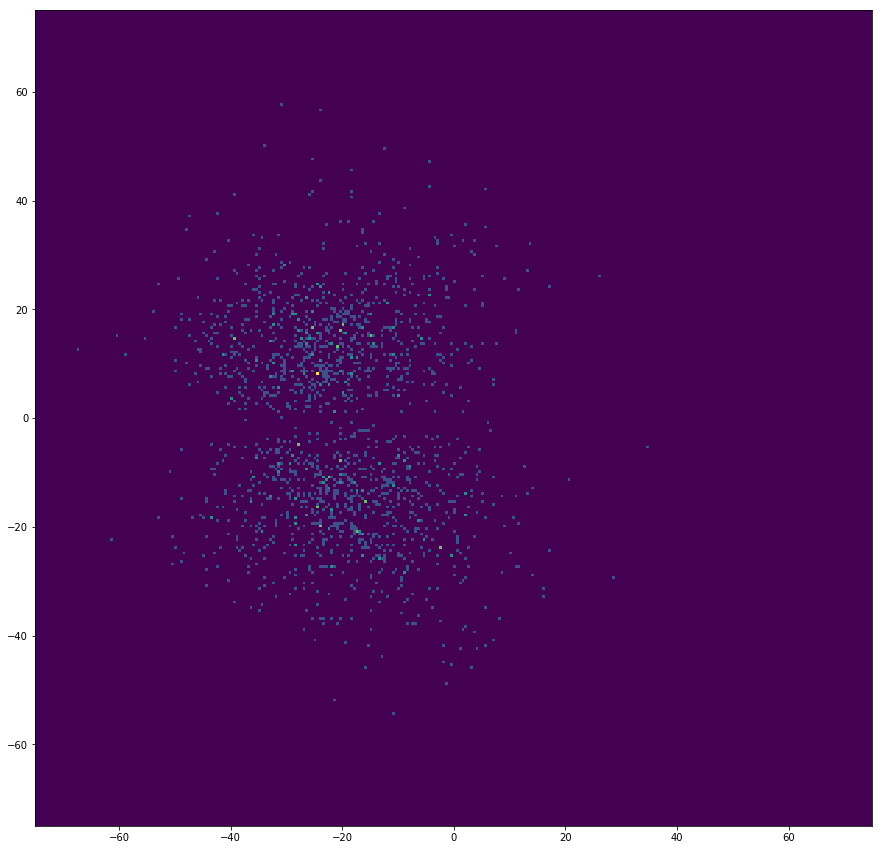

In [190]:
import matplotlib.animation as animation
from IPython.display import HTML

tmin = -75
tmax = 75
binN = 300

hist1 = fh.histogram2d(kECut['newt_y1'],kECut['newt_x1'],range= [[-75,75],[-75,75]],bins = 300)
hist2 = fh.histogram2d(kECut['newt_y2'],kECut['newt_x2'],range= [[-75,75],[-75,75]],bins = 300)


hist = hist1+hist2

dx = (tmax-tmin)/binN

y, x = np.mgrid[slice(tmin, tmax + dx, dx),
slice(tmin, tmax + dx, dx)]

plt.pcolormesh(x,y,hist)
plt.rcParams["figure.figsize"] = [15,15]
plt.show()


step_n = 3
max_delay = 1300

step_size = (8.776-4.6)/step_n
delay_step= max_delay/step_n

def newt_getslice(n):

    cent = 4.6
    maxi = 8.778 

    
    lowp = cent+ step_size*n
    higp = cent+ step_size*(n+1)
    
    lowm = cent- step_size*n
    higm = cent- step_size*(n+1)
    
    x1 = pd.concat([kECut['newt_x1'][(kECut['delay1']> lowp)&(kECut['delay1']<higp)],
                    kECut['newt_x1'][(kECut['delay1']> higm)&(kECut['delay1']<lowm)]])
    
    y1 = pd.concat([kECut['newt_y1'][(kECut['delay1']> lowp)&(kECut['delay1']<higp)],
                    kECut['newt_y1'][(kECut['delay1']> higm)&(kECut['delay1']<lowm)]])
    
    
    x2 = pd.concat([kECut['newt_x2'][(kECut['delay1']> lowp)&(kECut['delay1']<higp)],
                    kECut['newt_x2'][(kECut['delay1']> higm)&(kECut['delay1']<lowm)]])
    
    y2 = pd.concat([kECut['newt_y2'][(kECut['delay1']> lowp)&(kECut['delay1']<higp)],
                    kECut['newt_y2'][(kECut['delay1']> higm)&(kECut['delay1']<lowm)]])
    

    hist1 = fh.histogram2d(kECut['newt_y1'],kECut['newt_x1'],range= [[tmin,tmax],[tmin,tmax]],bins = binN)
    hist2 = fh.histogram2d(kECut['newt_y2'],kECut['newt_x2'],range= [[tmin,tmax],[tmin,tmax]],bins = binN)
    
    hist = hist1+hist2

    dx = (tmax-tmin)/binN

    y, x = np.mgrid[slice(tmin, tmax + dx, dx),
    slice(tmin, tmax + dx, dx)]

    plt.pcolormesh(x,y,hist)
    plt.rcParams["figure.figsize"] = [15,15]
    
    plt.title(str(int(delay_step*n))+' to '+str(int(delay_step*(n+1)))+' fs')
    plt.ylabel('Momentum (AU)')
    plt.xlabel('Momentum (AU)')
    plt.savefig('tmp'+str(n)+'.png')
    plt.close()

for i in range(step_n):
    
    newt_getslice(i)
